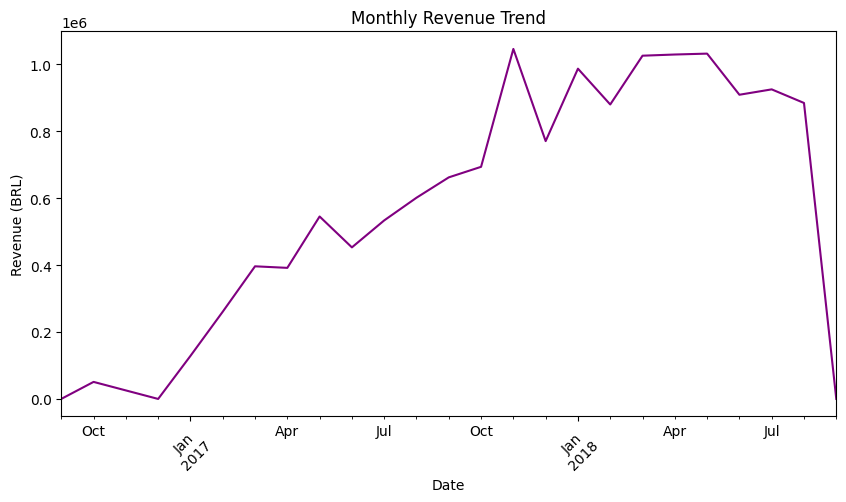

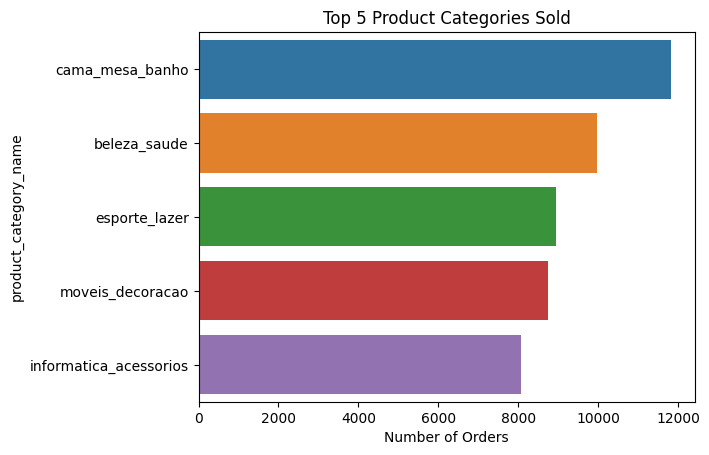

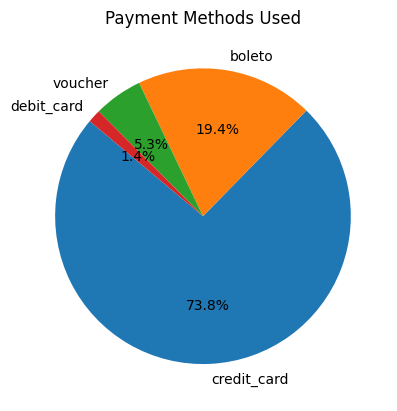

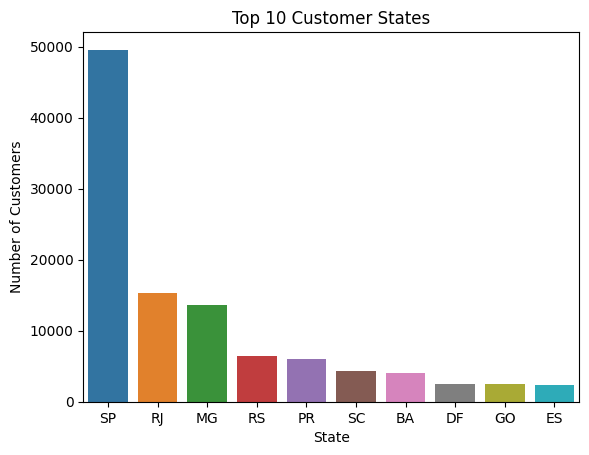

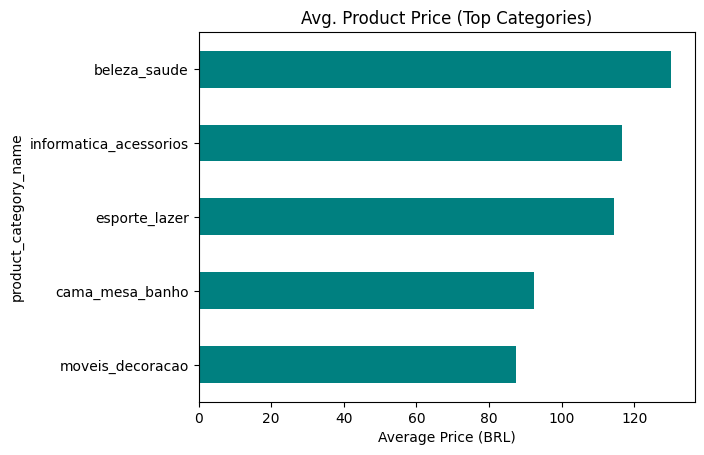

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load datasets
orders = pd.read_csv('/kaggle/input/brazilian-ecommerce/olist_orders_dataset.csv')
customers = pd.read_csv('/kaggle/input/brazilian-ecommerce/olist_customers_dataset.csv')
order_items = pd.read_csv('/kaggle/input/brazilian-ecommerce/olist_order_items_dataset.csv')
products = pd.read_csv('/kaggle/input/brazilian-ecommerce/olist_products_dataset.csv')
payments = pd.read_csv('/kaggle/input/brazilian-ecommerce/olist_order_payments_dataset.csv')
sellers = pd.read_csv('/kaggle/input/brazilian-ecommerce/olist_sellers_dataset.csv')

# Merge key tables
df = orders.merge(order_items, on='order_id') \
           .merge(customers, on='customer_id') \
           .merge(products, on='product_id') \
           .merge(payments, on='order_id')

# Convert date columns
df['order_purchase_timestamp'] = pd.to_datetime(df['order_purchase_timestamp'])

# Extract year-month for analysis
df['year_month'] = df['order_purchase_timestamp'].dt.to_period('M')

# 1. Monthly Revenue Trend
monthly_revenue = df.groupby('year_month')['price'].sum()
monthly_revenue.plot(figsize=(10, 5), title='Monthly Revenue Trend', color='purple')
plt.ylabel('Revenue (BRL)')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.show()

# 2. Top 5 Product Categories
top_categories = df['product_category_name'].value_counts().head(5)
sns.barplot(x=top_categories.values, y=top_categories.index)
plt.title("Top 5 Product Categories Sold")
plt.xlabel("Number of Orders")
plt.show()

# 3. Payment Types Distribution
payment_counts = df['payment_type'].value_counts()
payment_counts.plot(kind='pie', autopct='%1.1f%%', startangle=140)
plt.title("Payment Methods Used")
plt.ylabel('')
plt.show()

# 4. Customer Segmentation by State
customer_state_counts = df['customer_state'].value_counts().head(10)
sns.barplot(x=customer_state_counts.index, y=customer_state_counts.values)
plt.title("Top 10 Customer States")
plt.ylabel("Number of Customers")
plt.xlabel("State")
plt.show()

# 5. Average Product Price per Category (Top 5)
top_categories_price = df[df['product_category_name'].isin(top_categories.index)] \
    .groupby('product_category_name')['price'].mean().sort_values()
top_categories_price.plot(kind='barh', color='teal')
plt.title("Avg. Product Price (Top Categories)")
plt.xlabel("Average Price (BRL)")
plt.show()

# Optional: Save final cleaned dataset
df.to_csv("olist_cleaned_merged_data.csv", index=False)
